# Compare Buenrostro ATAC-seq data with ATAC-STARR-seq accessibility data

## Introduction

With ATAC-STARR-seq, we can extract accessibility peaks processing the data in a similar fashion to ATAC-seq. Given that the original ATAC-seq paper (henceforth referred to as Buenrostro) used GM12878 cells, we want to compare our data to their gold-standard dataset.

Below I perform a host of analyses comparing the two peaksets. Both peaksets were generated using my processing pipeline and called with genrich at a q value of 0.0001. In other words, the only difference between the peaksets are the fastq files that were generated for the experiments. 

## Compare number and overlap

In [1]:
%%bash
BUEN_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

In [2]:
%%bash
# how many of each?
wc -l ${AS_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
wc -l ${BUEN_DIR}/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak

101904 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
82337 /data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak


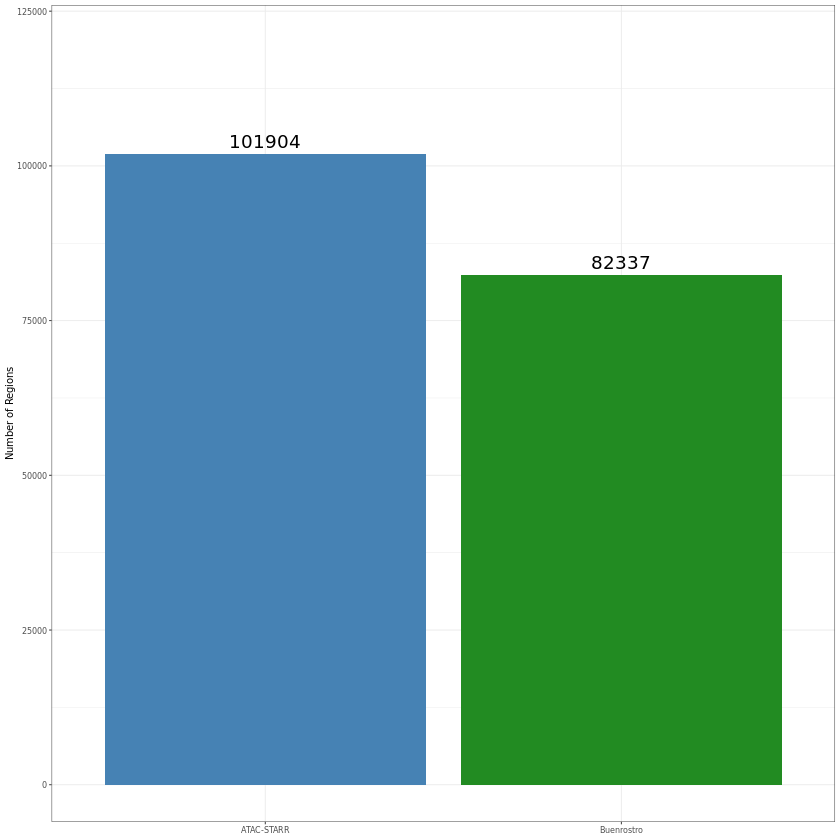

In [14]:
# make a simple barchart:
library(ggplot2)

df <- data.frame(Group = c("ATAC-STARR","Buenrostro"),
  value = c(101904, 82337))

bar <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_bw(base_family = "Arial", base_size = 6) + 
  ylab("Number of Regions") +
  scale_fill_manual(values = c("steelblue", "forestgreen")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 120000))

bar

In [15]:
#Save bar plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(bar, filename = paste0(res, "/accessibility_peak-count.pdf"), device = cairo_pdf, width = 3, height = 3)

In [2]:
%%bash
BUEN_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

#compare ours and buenrostro:
bedtools jaccard -a ${AS_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak \
    -b ${BUEN_DIR}/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak

intersection	union	jaccard	n_intersections
38454012	80486872	0.477767	62443


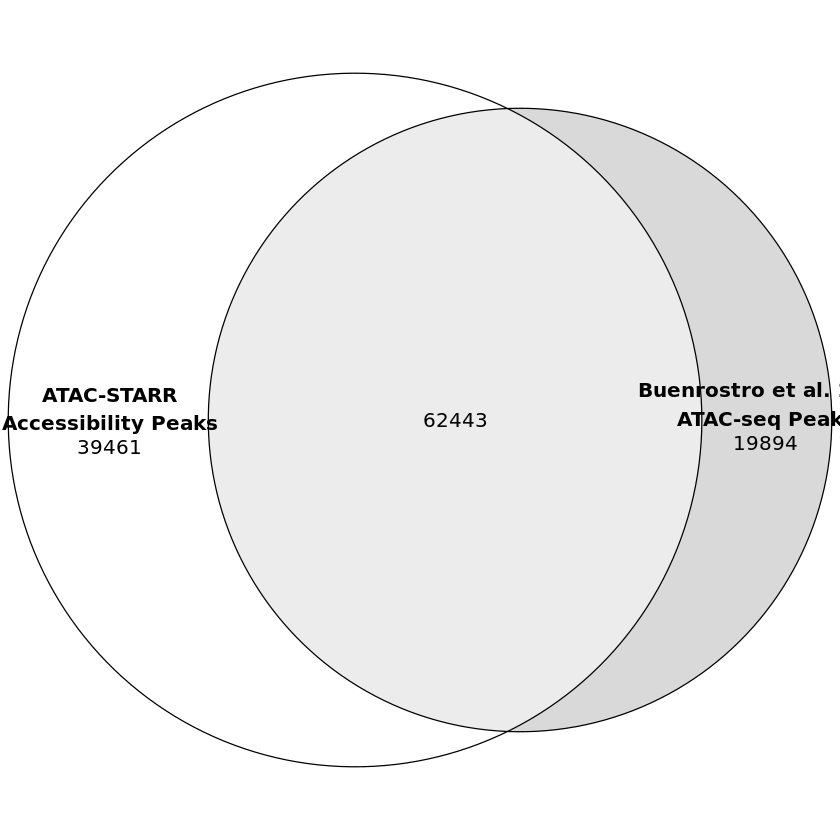

In [1]:
library(eulerr)

#Make a vector of the values above:
combo <- c(`ATAC-STARR\nAccessibility Peaks` = 101904-62443, `Buenrostro et al. 2013\nATAC-seq Peaks` = 82337-62443, 
           "ATAC-STARR\nAccessibility Peaks&Buenrostro et al. 2013\nATAC-seq Peaks" = 62443)
eul <- plot(euler(combo), quantities = TRUE) 
eul

In [3]:
#Save euler plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggplot2::ggsave(eul, filename = paste0(res, "/accessibility_euler-plot.pdf"), device = cairo_pdf, width = 5, height = 3)

## Genome coverage

While peak count could be different their sizes may not. Therefore, we should ask what percent of the genome is covered by the two peaksets. 

In [17]:
library(tidyverse)

BUEN_DIR <- '/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR <- '/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

AS <- read_tsv(paste0(AS_DIR, "/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak"), 
              col_names = c("chr", "start", "end", "name", "score", "strand", "signalValue", "pvalue", "qvalue", "peak")) %>% 
    mutate(size = end-start)

BUEN <- read_tsv(paste0(BUEN_DIR, "/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak"), 
              col_names = c("chr", "start", "end", "name", "score", "strand", "signalValue", "pvalue", "qvalue", "peak")) %>% 
    mutate(size = end-start)

#determine percentage of genome by dividing sum of bps by genome size ~3e9. 
sum(AS$size)/3e9
sum(BUEN$size)/3e9

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  chr = col_character(),
  start = col_double(),
  end = col_double(),
  name = col_character(),
  score = col_double(),
  strand = col_character(),
  signalValue = col_double(),
  pvalue = col_double(),
  qvalue = col_double(),
  peak = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  chr = col_character(),
  start = col_double(),
  end = col_double(),
  name = col_character(),
  score = col_double(),
  strand = col_character(),
  signalValue = col_double(),
  pvalue = col_doub

[1] 0.02221054

[1] 0.01743642

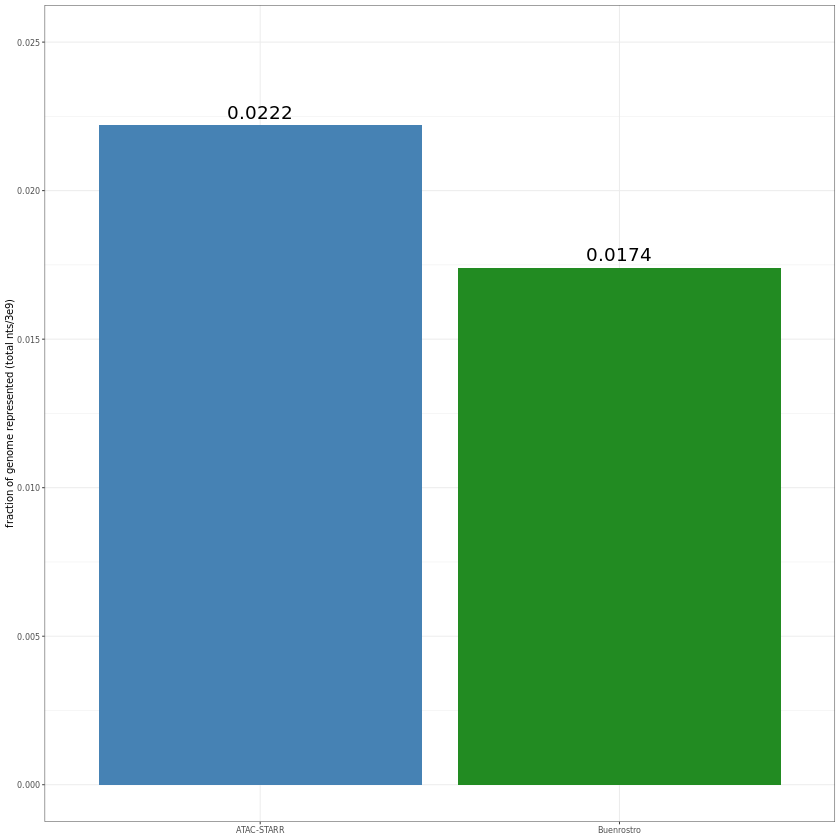

In [22]:
#make barchart of genome coverage
library(ggplot2)

df <- data.frame(Group = c("ATAC-STARR","Buenrostro"),
  value = c(0.0222, 0.0174))

bar <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_bw(base_family = "Arial", base_size = 6) + 
  ylab("fraction of genome represented (total nts/3e9)") +
  scale_fill_manual(values = c("steelblue", "forestgreen")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 0.025))

bar

In [23]:
#Save euler plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(bar, filename = paste0(res, "/accessibility_genomic-coverage.pdf"), device = cairo_pdf, width = 3, height = 3)

## Fraction of reads in peaks (FRiP score)

In [1]:
%%bash
#Buenrostro
BAM='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam'
PEAK='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak'

echo "Buenrostro ATAC-seq" 
echo "Reads in Peaks" 
samtools view -L $PEAK $BAM | wc -l
echo "Total Reads" 
samtools view $BAM | wc -l

Buenrostro ATAC-seq
Reads in Peaks
26736172
Total Reads
129433258


In [3]:
%%bash
BAM='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.n-sorted.bam'
PEAK='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'

echo "GM12878 ATAC-STARR" 
echo "Reads in Peaks" 
samtools view -L $PEAK $BAM | wc -l
echo "Total Reads" 
samtools view $BAM | wc -l 

GM12878 ATAC-STARR
Reads in Peaks
104684749
Total Reads
142021965


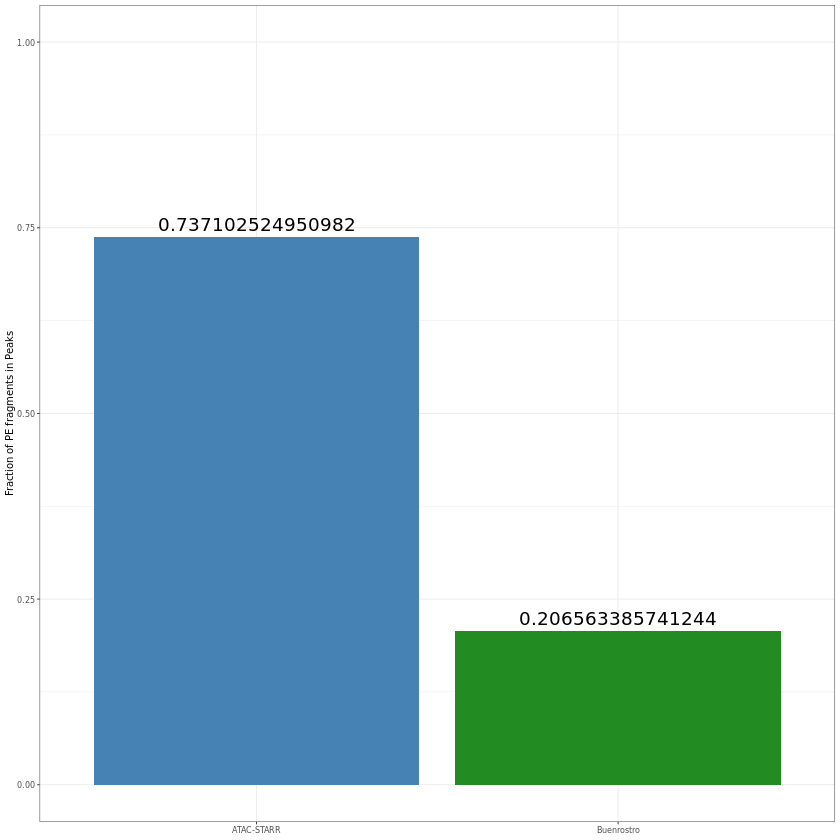

In [6]:
#plot
library(tidyverse)

results <- data.frame(frip = c(104684749,26736172), total = c(142021965,129433258), sample = c("ATAC-STARR", "Buenrostro")) %>% 
    mutate(frip_perc = frip/total)

frip <- ggplot(results, aes(x=sample, y=frip_perc, fill = sample)) +
  geom_col() +
  geom_text(aes(label = frip_perc), vjust = -0.5) +
  scale_fill_manual(values = c("steelblue", "forestgreen")) +
  coord_cartesian(ylim=c(0,1)) +
  ylab("Fraction of PE fragments in Peaks") +
  theme_bw(base_size = 6, base_family = "Arial") +
  theme(legend.position = "none",  
        axis.title.x = element_blank())
frip

In [7]:
#Save euler plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(frip, filename = paste0(res, "/accessibility_frip.pdf"), device = cairo_pdf, width = 3, height = 3)

## Compare ATAC-seq signal at a representative locus

### Generate BigWigs

In [1]:
%%bash 
AS_BAM='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'
BUEN_BAM='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam'

bamCoverage -b $AS_BAM \
    -o ${RES_DIR}/GM12878inGM12878_DNA_3-reps_no-dup_cpm.bw \
    -of bigwig --binSize 10 --normalizeUsing CPM --extendReads -p 12

bamCoverage -b $BUEN_BAM \
    -o ${RES_DIR}/GM12878_ATAC-seq_buenrostro_no-dup_cpm.bw \
    -of bigwig --binSize 10 --normalizeUsing CPM --extendReads -p 12

normalization: CPM
bamFilesList: ['/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam']
binLength: 10
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkSize: None
defaultFragmentLength: 111
numberOfProcessors: 12
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 10
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 444
normalization: CPM
bamFilesList: ['/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam']
binLength: 10
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkSize:

In [1]:
%%bash 

RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#convert to bedgraph
bigWigToBedGraph ${RES_DIR}/GM12878inGM12878_DNA_3-reps_no-dup_cpm.bw ${RES_DIR}/GM12878inGM12878_DNA_3-reps_no-dup_cpm.bedGraph
bigWigToBedGraph ${RES_DIR}/GM12878_ATAC-seq_buenrostro_no-dup_cpm.bw ${RES_DIR}/GM12878_ATAC-seq_buenrostro_no-dup_cpm.bedGraph

### Plot signal with Sushi

In [3]:
library(Sushi)
#cannot use tidyverse, only base R
#signal
AS_ATAC <- read.delim("/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation/GM12878inGM12878_DNA_3-reps_no-dup_cpm.bedGraph", header = FALSE)
buenrostro <- read.delim("/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation/GM12878_ATAC-seq_buenrostro_no-dup_cpm.bedGraph", header = FALSE)

#genes
RefSeq_genes <- read.delim("/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation/hg38.ncbiRefSeq_exons-Sushi-compatible.bed", header = FALSE)

In [ ]:
RefSeq_genes_pos <- RefSeq_genes[RefSeq_genes[6] == "+",]
RefSeq_genes_pos[6] <- 1
RefSeq_genes_neg <- RefSeq_genes[RefSeq_genes[6] == "-",]
RefSeq_genes_neg[6] <- -1

genes <- rbind(RefSeq_genes_pos, RefSeq_genes_neg)

In [ ]:
#filter to chr19 to work with smaller files
g <- genes[genes[1] == "chr19",]
a <- AS_ATAC[AS_ATAC[1] == "chr19",]
b <- buenrostro[buenrostro[1] == "chr19",]

In [ ]:
#make sushi plot
chrom = "chr19"
chromstart = 35611232
chromend = 35798446 

dev.off()

pdf("/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures/accessibilty_signal_cpm.pdf", width=6, height=3)

layout(matrix(c(1,1,
                2,2,
                2,2,
                3,3,
                3,3), ncol = 2, byrow = TRUE))
par(mar=c(0, 4, 0, 0))

plotGenes(geneinfo = g,chrom,chromstart,chromend, bentline = FALSE, arrowlength = 0.005, col = "black",types = "exon", maxrows=2, bheight=0.15, 
          labeloffset=0.5, fontsize=0.75, labeltext=TRUE)

plotBedgraph(signal = a,chrom,chromstart,chromend,transparency=1,color="steelblue")
axis(side=2,las=2,tcl=.2)
labelgenome(chrom,chromstart,chromend,side=1,n=3,scale="Kb")

plotBedgraph(signal = b, chrom, chromstart, chromend,transparency=1,color="forestgreen")
axis(side=2,las=2,tcl=.2)
labelgenome(chrom,chromstart,chromend,side=1,n=3,scale="Kb")
dev.off()